<a href="https://colab.research.google.com/github/kashish605/DS-03-Project/blob/main/Employee_Attrition_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Employee Attrition Analysis**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pwd

'C:\\Users\\Kashish'

In [ ]:
cd Downloads

C:\Users\Kashish\Downloads


In [ ]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 549C-11E0

 Directory of C:\Users\Kashish\Downloads

08/16/2024  04:04 PM    <DIR>          .
08/16/2024  04:04 PM    <DIR>          ..
03/30/2024  10:10 AM           506,504 10213069850140.pdf
04/30/2024  03:19 PM           505,979 10213069850141.pdf
06/12/2024  09:37 AM            40,364 12310302 (1).pdf
06/11/2024  02:21 PM            40,376 12310302.pdf
06/09/2024  02:37 PM        18,636,546 12th Punjab board 2024.xlsx
07/23/2024  03:51 PM           443,552 1-3662081402276_159226659_6_2024.pdf
07/23/2024  03:51 PM           412,421 1-3662081402276_57797735_98160XXXXX_5_2024.pdf
05/10/2024  08:12 PM            39,300 1971XXXXXX8771_20240510201033561309.pdf
04/16/2024  04:49 PM        32,788,689 1st AmiLex National Moot Court Competition, 2024.pdf
05/17/2024  10:35 AM           179,846 2023_B.Arch.pdf
04/19/2024  10:20 AM           168,551 2023_BID (1).pdf
04/10/2024  10:04 AM           168,551 2023_BID.pdf
03/08/2024  11:22 

In [ ]:
df = pd.read_csv('Attrition data.csv.csv')

In [ ]:
df.head(10)

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
5,6,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,1,Female,...,28.0,5,7,7,7,3.0,2.0,2.0,3,3
6,7,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,Male,...,5.0,2,0,0,0,1.0,3.0,1.0,3,4
7,8,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,1,Male,...,10.0,2,0,0,0,1.0,2.0,3.0,3,4
8,9,31,No,Travel_Rarely,Research & Development,1,3,Life Sciences,1,Male,...,10.0,2,9,7,8,2.0,4.0,3.0,3,4
9,10,25,No,Non-Travel,Research & Development,7,4,Medical,1,Female,...,6.0,2,6,1,5,2.0,1.0,3.0,3,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [ ]:
df.describe()

,EmployeeID,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,...,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000
mean,2205.500000,36.923810,9.192517,2.912925,1.0,2.063946,65029.312925,2.694830,15.209524,8.0,...,11.279936,2.799320,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436,2.729932,3.153741
std,1273.201673,9.133301,8.105026,1.023933,0.0,1.106689,47068.888559,2.498887,3.659108,0.0,...,7.782222,1.288978,6.125135,3.221699,3.567327,1.092756,1.101253,0.706245,0.711400,0.360742
min,1.000000,18.000000,1.000000,1.000000,1.0,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,1103.250000,30.000000,2.000000,2.000000,1.0,1.000000,29110.000000,1.000000,12.000000,8.0,...,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,2205.500000,36.000000,7.000000,3.000000,1.0,2.000000,49190.000000,2.000000,14.000000,8.0,...,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3307.750000,43.000000,14.000000,4.000000,1.0,3.000000,83800.000000,4.000000,18.000000,8.0,...,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,4410.000000,60.000000,29.000000,5.000000,1.0,5.000000,199990.000000,9.000000,25.000000,8.0,...,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


**Relationship between monthly income and attrition:**

In [ ]:
# Relationship between monthly income and attrition
income_attrition = df.groupby('Attrition',as_index=False)['MonthlyIncome'].mean()


In [ ]:
income_attrition

,Attrition,MonthlyIncome
0,No,65672.595296
1,Yes,61682.616034


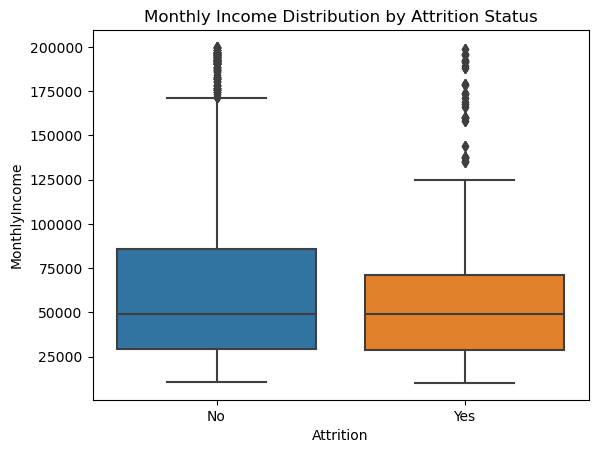

In [ ]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly Income Distribution by Attrition Status')
plt.show()

**Average ratings for satisfaction metrics by attrition:**

In [ ]:

satisfaction_metrics = df.groupby('Attrition')[['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement']].mean()


satisfaction_metrics


,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement
Attrition,,,,
No,2.772493,2.777989,2.780900,2.734793
Yes,2.468839,2.470423,2.660537,2.704641


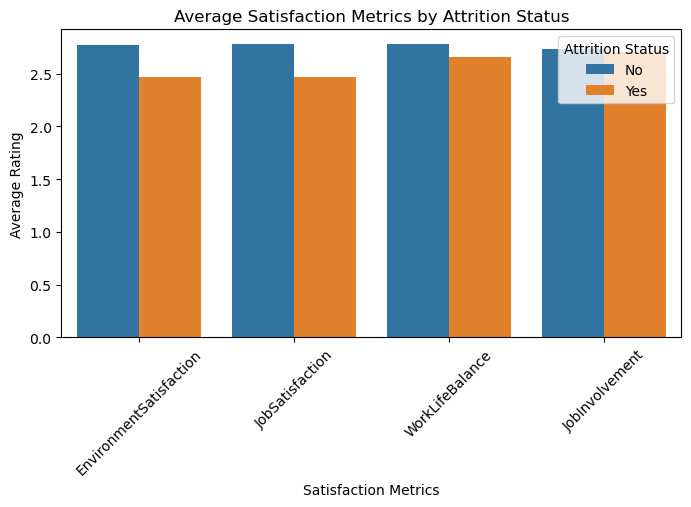

In [ ]:
# Assuming `df` is your DataFrame and you have already calculated `satisfaction_metrics`
satisfaction_metrics = df.groupby('Attrition')[['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement']].mean()

# Reset index to plot easily
satisfaction_metrics = satisfaction_metrics.reset_index()

# Melt the DataFrame to have a long-form DataFrame suitable for seaborn
satisfaction_metrics_melted = satisfaction_metrics.melt(id_vars='Attrition', var_name='Metric', value_name='AverageRating')

# Plotting
plt.figure(figsize=(8, 4))
sns.barplot(data=satisfaction_metrics_melted, x='Metric', y='AverageRating', hue='Attrition')
plt.title('Average Satisfaction Metrics by Attrition Status')
plt.xlabel('Satisfaction Metrics')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.legend(title='Attrition Status')
plt.show()

**Correlation matrix for numerical features**

In [ ]:
correlation_matrix = df[['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']].corr()

print("Correlation Matrix:")
correlation_matrix


Correlation Matrix:


,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.006963,-0.044314,0.299243,0.680661,-0.027308,0.311309,0.216513,0.202089
DistanceFromHome,0.006963,1.000000,-0.021607,-0.013843,0.009374,-0.009001,0.031684,0.002290,0.021584
MonthlyIncome,-0.044314,-0.021607,1.000000,-0.020726,-0.033787,0.050112,0.000995,0.065219,0.024304
NumCompaniesWorked,0.299243,-0.013843,-0.020726,1.000000,0.238807,-0.032286,-0.117959,-0.036656,-0.109667
TotalWorkingYears,0.680661,0.009374,-0.033787,0.238807,1.000000,-0.040762,0.627703,0.404444,0.458800
TrainingTimesLastYear,-0.027308,-0.009001,0.050112,-0.032286,-0.040762,1.000000,-0.007894,0.016121,-0.013270
YearsAtCompany,0.311309,0.031684,0.000995,-0.117959,0.627703,-0.007894,1.000000,0.618409,0.769212
YearsSinceLastPromotion,0.216513,0.002290,0.065219,-0.036656,0.404444,0.016121,0.618409,1.000000,0.510224
YearsWithCurrManager,0.202089,0.021584,0.024304,-0.109667,0.458800,-0.013270,0.769212,0.510224,1.000000


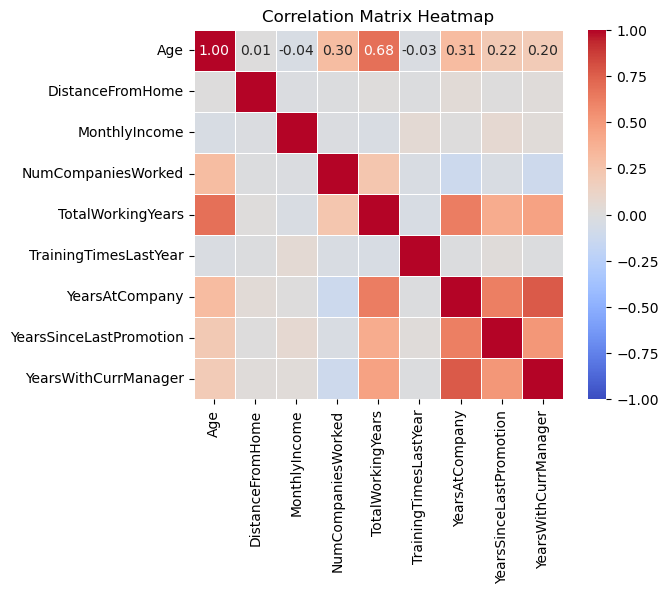

In [ ]:

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0, linewidths=0.5, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

**Gender Wise Analysis of Employee Attrition:**

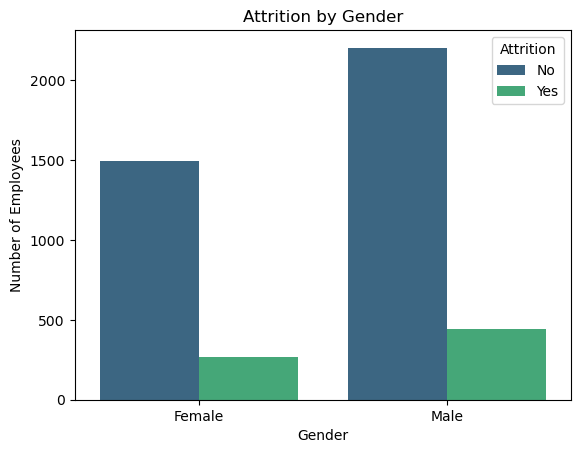

In [ ]:
sns.countplot(data=df, x='Gender', hue='Attrition', palette='viridis')

# Add title and labels
plt.title('Attrition by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition')

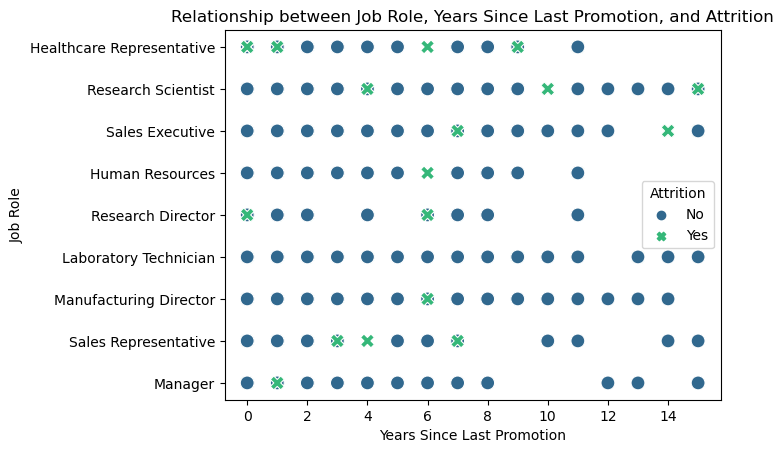

In [ ]:
sns.scatterplot(data=df, x='YearsSinceLastPromotion', y='JobRole', hue='Attrition', palette='viridis', style='Attrition', s=100)

# Add title and labels
plt.title('Relationship between Job Role, Years Since Last Promotion, and Attrition')
plt.xlabel('Years Since Last Promotion')
plt.ylabel('Job Role')
plt.legend(title='Attrition')

# Show plot
plt.show()